In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, TimeDistributed, RepeatVector
sns.set(style='whitegrid')

In [2]:
np.random.seed(42)
time_steps = 50
features = 5
samples = 1000
data = np.random.rand(samples, time_steps, features)
target = np.random.randint(0, 2, (samples, time_steps, 1))
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2,
random_state=42)

In [3]:
scaler = MinMaxScaler()
X_train = X_train.reshape(-1, features)
X_test = X_test.reshape(-1, features)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_train = X_train.reshape(-1, time_steps, features)
X_test = X_test.reshape(-1, time_steps, features)

In [6]:
vector_to_seq_model = Sequential([
LSTM(100, activation='relu', input_shape=(time_steps, features)),
RepeatVector(time_steps),
LSTM(100, activation='relu', return_sequences=True),
TimeDistributed(Dense(1, activation='sigmoid'))
])

Epoch 1/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 10s 149ms/step - accuracy: 0.5011 - loss: 0.6935 - val_accuracy: 0.4996 - val_loss: 0.6933
Epoch 2/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 83ms/step - accuracy: 0.4989 - loss: 0.6933 - val_accuracy: 0.5004 - val_loss: 0.6932
Epoch 3/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 115ms/step - accuracy: 0.5034 - loss: 0.6931 - val_accuracy: 0.4989 - val_loss: 0.6932
Epoch 4/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 81ms/step - accuracy: 0.5064 - loss: 0.6931 - val_accuracy: 0.5004 - val_loss: 0.6932
Epoch 5/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 82ms/step - accuracy: 0.5015 - loss: 0.6931 - val_accuracy: 0.4979 - val_loss: 0.6932
Epoch 6/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 82ms/step - accuracy: 0.5025 - loss: 0.6931 - val_accuracy: 0.4940 - val_loss: 0.6932
Epoch 7/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 82ms/step - accuracy: 0.5018 - loss: 0.6932 - val_accuracy: 0.5004 - val_loss: 0.6933
Epoch 8/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 109ms/step - accuracy: 0.5007 - loss: 0.6932 - val_accuracy: 0.4926

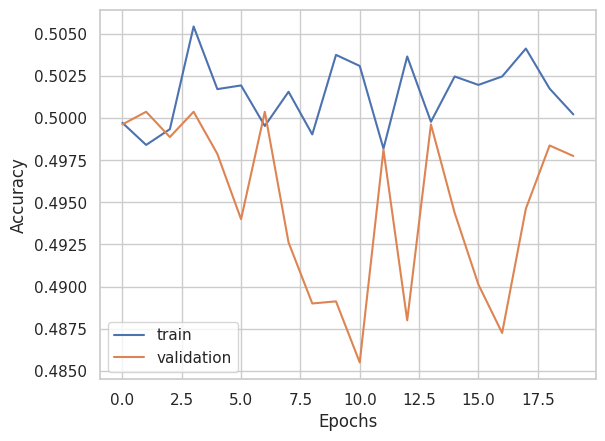

In [7]:
vector_to_seq_model.compile(optimizer='adam', loss='binary_crossentropy',
metrics=['accuracy'])
history_vector_to_seq = vector_to_seq_model.fit(X_train, y_train, epochs=20,
batch_size=32, validation_split=0.2, verbose=1)
loss, accuracy = vector_to_seq_model.evaluate(X_test, y_test)
print(f"Vector-to-Seq Model Accuracy: {accuracy}")
plt.plot(history_vector_to_seq.history['accuracy'], label='train')
plt.plot(history_vector_to_seq.history['val_accuracy'], label='validation')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [8]:
y_train_flat = y_train.reshape(-1, time_steps)
y_test_flat = y_test.reshape(-1, time_steps)
seq_to_symbol_model = Sequential([
LSTM(100, activation='relu', input_shape=(time_steps, features)),
Dense(time_steps, activation='sigmoid')
])
seq_to_symbol_model.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])

Epoch 1/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 55ms/step - accuracy: 0.1878 - loss: 0.6934 - val_accuracy: 0.0125 - val_loss: 0.6934
Epoch 2/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - accuracy: 0.0000e+00 - loss: 0.6927 - val_accuracy: 0.0000e+00 - val_loss: 0.6936
Epoch 3/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - accuracy: 0.0000e+00 - loss: 0.6923 - val_accuracy: 0.0000e+00 - val_loss: 0.6938
Epoch 4/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - accuracy: 0.0000e+00 - loss: 0.6919 - val_accuracy: 0.0000e+00 - val_loss: 0.6940
Epoch 5/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.0000e+00 - loss: 0.6924 - val_accuracy: 0.0000e+00 - val_loss: 0.6940
Epoch 6/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.0000e+00 - loss: 0.6920 - val_accuracy: 0.0000e+00 - val_loss: 0.6943
Epoch 7/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.0000e+00 - loss: 0.6916 - val_accuracy: 0.0000e+00 - val_loss: 0.6942
Epoch 8/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 

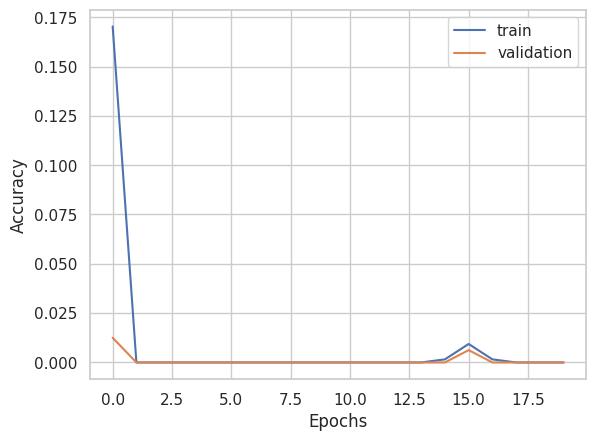

In [9]:
history_seq_to_symbol = seq_to_symbol_model.fit(X_train, y_train_flat, epochs=20,
batch_size=32, validation_split=0.2, verbose=1)
loss, accuracy = seq_to_symbol_model.evaluate(X_test, y_test_flat)
print(f"Sequence-to-Symbol Model Accuracy: {accuracy}")
plt.plot(history_seq_to_symbol.history['accuracy'], label='train')
plt.plot(history_seq_to_symbol.history['val_accuracy'], label='validation')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()